In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
gs = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
gs.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % gs.best_score_)
print(gs.best_params_)

Best parameter (CV score=0.918):
{'logistic__alpha': 1.0, 'pca__n_components': 30}


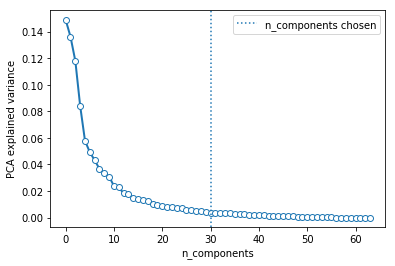

In [3]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(X_digits)

plt.plot(pca.explained_variance_ratio_, linewidth=2, marker='o', mfc='w')
plt.xlabel('n_components')
plt.ylabel('PCA explained variance')

plt.axvline(gs.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.legend()

Text(0, 0.5, 'Classification accuracy (val)')

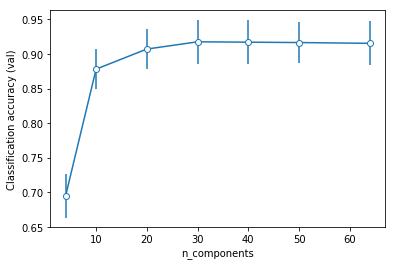

In [4]:
# 繪製 7 個不同採樣點的 accuracy
results = pd.DataFrame(gs.cv_results_)

components_col = 'param_pca__n_components'
best_clf = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clf.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, marker='o', mfc='w')
plt.xlabel('n_components')
plt.ylabel('Classification accuracy (val)')


In [5]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045883,0.007379,0.000466,0.000014,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.739011,0.593923,0.704735,0.736695,0.690141,0.692901,0.052893,20
1,0.027884,0.004825,0.000415,0.000006,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.845304,0.891365,0.904762,0.842254,0.878056,0.028493,16
2,0.031187,0.002381,0.000435,0.000020,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.925824,0.870166,0.905292,0.949580,0.884507,0.907074,0.028401,13
3,0.039921,0.003476,0.000507,0.000025,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.920330,0.864641,0.933148,0.952381,0.876056,0.909311,0.033603,11
4,0.044444,0.003597,0.000468,0.000048,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.903846,0.870166,0.938719,0.949580,0.887324,0.909927,0.030100,10
5,0.051255,0.001550,0.000545,0.000042,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.887363,0.875691,0.941504,0.949580,0.884507,0.907729,0.031218,12
6,0.058393,0.005787,0.000569,0.000098,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.912088,0.875691,0.941504,0.946779,0.895775,0.914367,0.026958,8
7,0.960653,0.652579,0.000627,0.000040,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.728022,0.596685,0.738162,0.708683,0.684507,0.691212,0.050685,21
8,0.040048,0.005630,0.000440,0.000041,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.898352,0.853591,0.885794,0.910364,0.839437,0.877507,0.026848,17
9,0.042743,0.006075,0.000465,0.000041,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.917582,0.878453,0.922006,0.943978,0.873239,0.907052,0.027052,14
